In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import ipywidgets as widgets
from IPython.display import display

In [11]:
# Define the Black-Scholes formula for call options
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Define the Black-Scholes formula for put options
def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price


In [15]:
# Function to plot option prices
def plot_option_prices(S, K, T, r, sigma_range):
    call_prices = [black_scholes_call(S, K, T, r, sigma) for sigma in sigma_range]
    put_prices = [black_scholes_put(S, K, T, r, sigma) for sigma in sigma_range]
    plt.figure(figsize=(14, 5))
    plt.plot(sigma_range, call_prices, label='Call Price', color='blue')
    plt.plot(sigma_range, put_prices, label='Put Price', color='red')
    plt.title('Option Prices vs. Volatility')
    plt.xlabel('Volatility (σ)')
    plt.ylabel('Option Price')
    plt.legend()
    plt.grid()
    plt.show()


In [13]:
# Set parameters
S = 100  # Current stock price
K = 100  # Strike price
T = 1    # Time to expiration in years
r = 0.05 # Risk-free interest rate

# Calculate and display call and put prices for given volatility
sigma = 0.2  # Volatility of the underlying stock
call_price = black_scholes_call(S, K, T, r, sigma)
put_price = black_scholes_put(S, K, T, r, sigma)

print("Call Option Price:", call_price)
print("Put Option Price:", put_price)

Call Option Price: 10.450583572185565
Put Option Price: 5.573526022256971


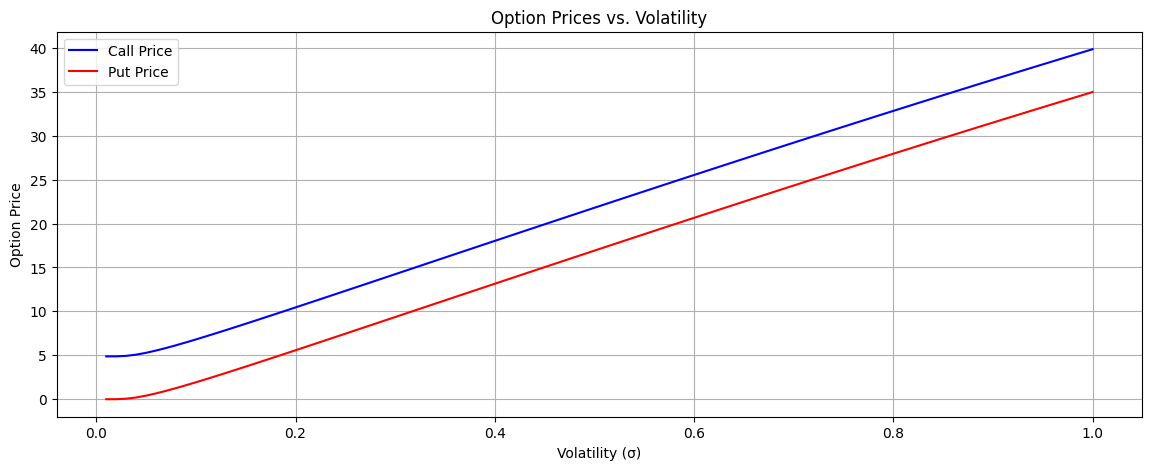

In [16]:
# Plot option prices against a range of volatilities
sigma_range = np.linspace(0.01, 1, 100)
plot_option_prices(S, K, T, r, sigma_range)

In [17]:
# Define functions to calculate Greeks
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

def delta_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1) - 1

def gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def theta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))) - r * K * np.exp(-r * T) * norm.cdf(d2)

def theta_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))) + r * K * np.exp(-r * T) * norm.cdf(-d2)

def rho_call(S, K, T, r, sigma):
    d2 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T - sigma * np.sqrt(T)) / (sigma * np.sqrt(T))
    return K * T * np.exp(-r * T) * norm.cdf(d2)

def rho_put(S, K, T, r, sigma):
    d2 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T - sigma * np.sqrt(T)) / (sigma * np.sqrt(T))
    return -K * T * np.exp(-r * T) * norm.cdf(-d2)


In [18]:
# Interactive widgets for parameter adjustment
def update_option_prices(S, K, T, r, sigma):
    call_price = black_scholes_call(S, K, T, r, sigma)
    put_price = black_scholes_put(S, K, T, r, sigma)

    # Display option prices
    print(f"Call Option Price: {call_price:.2f}")
    print(f"Put Option Price: {put_price:.2f}")

    # Calculate and display Greeks
    print(f"Delta Call: {delta_call(S, K, T, r, sigma):.4f}, Delta Put: {delta_put(S, K, T, r, sigma):.4f}")
    print(f"Gamma: {gamma(S, K, T, r, sigma):.4f}")
    print(f"Vega: {vega(S, K, T, r, sigma):.4f}")
    print(f"Theta Call: {theta_call(S, K, T, r, sigma):.4f}, Theta Put: {theta_put(S, K, T, r, sigma):.4f}")
    print(f"Rho Call: {rho_call(S, K, T, r, sigma):.4f}, Rho Put: {rho_put(S, K, T, r, sigma):.4f}")

# Create interactive widgets
S_widget = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Stock Price (S):')
K_widget = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price (K):')
T_widget = widgets.FloatSlider(value=1, min=0.01, max=2, step=0.01, description='Time to Expiry (T):')
r_widget = widgets.FloatSlider(value=0.05, min=0, max=0.2, step=0.01, description='Risk-Free Rate (r):')
sigma_widget = widgets.FloatSlider(value=0.2, min=0.01, max=1, step=0.01, description='Volatility (σ):')

# Use interactive output
widgets.interactive(update_option_prices, S=S_widget, K=K_widget, T=T_widget, r=r_widget, sigma=sigma_widget)


interactive(children=(FloatSlider(value=100.0, description='Stock Price (S):', max=150.0, min=50.0, step=1.0),…

In [ ]:
def save_results(call_price, put_price, greeks):
    results = {
        "Call Price": call_price,
        "Put Price": put_price,
        **greeks
    }
    df = pd.DataFrame(results, index=[0])
    df.to_csv('option_pricing_results.csv', index=False)
    print("Results saved to option_pricing_results.csv")